In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
from socc_har.data import DataModule
from socc_har.eval import ReportEvaluationModule

data_path = '../data'
out_path='.'
metadata_file=None
num_frames = 32
res = 224
fps=12

dm = DataModule(database='socc-har-32-v0.1.1',
                data_dir=data_path, out_dir=out_path,
                num_frames=num_frames,
                res=res, fps=fps,
                #batch_size=multi_clip_test_bs if consensus != 'pool' else single_clip_test_bs,
                max_train_samples_per_class=200,
                metadata_path=metadata_file,
                #test_duration=test_clip_duration,
                #num_test_crops=num_test_crops if consensus != 'pool' else 1,
                #num_test_frames=num_test_frames if consensus == 'pool' else None
                )

db = dm.database


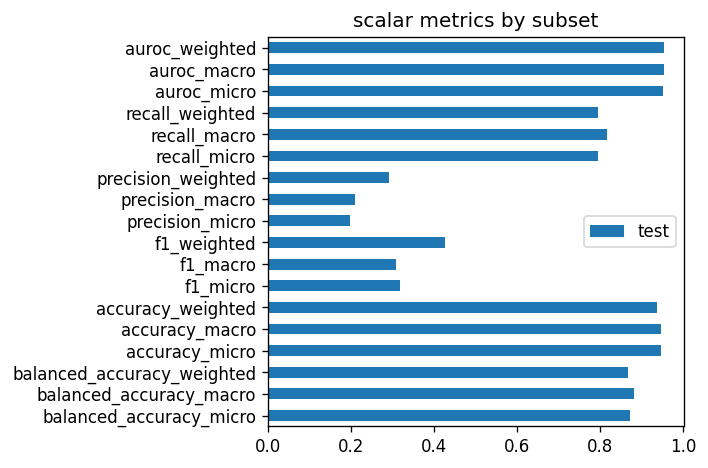

In [69]:
top_8 = ['corner', 'throwIn', 'kickOff', 'footShot', 'goal', 'penaltyKick', 'goalKick', 'substitution']
top_16 = top_8 + ['injury', 'cross', 'finalWhistle', 'card', 'freeKick', 'save', 'headerShot', 'badBehavior']
top_24 = top_16 + ['shield', 'foul', 'throughBall', 'punch', 'refereeBallDrop', '50-50', 'collected', 'backheel']
top_32 = dm.classes

top_net = ['card', 'goal', 'substitution']
top_db = ['injury', 'card', 'footShot', 'substitution', 'freeKick', 'corner', 'save', 'penaltyKick', 'foul', 'goal']

subset = top_8

df = pd.read_csv(f'./cluster/csn_best.csv')
class_idxs = [dm.classes.index(cls) for cls in subset]
eval = ReportEvaluationModule('.', dm, df, None, ['png', 'eps'], class_idxs=class_idxs)
fig, metrics = eval.get_scalars(False)
#_, au = eval.get_scalar_by_class('test', 'auroc', True)
fig

In [71]:
import torch
torch.Tensor(metrics['test'])[[1, 7, 16, 10]]

tensor([0.8822, 0.3089, 0.9545, 0.2098])

corner
throwIn
kickOff
footShot
goal
penaltyKick
goalKick
substitution
injury
cross
finalWhistle
card
freeKick
save
headerShot
badBehavior
shield
foul
throughBall
punch
refereeBallDrop
50-50
collected
backheel


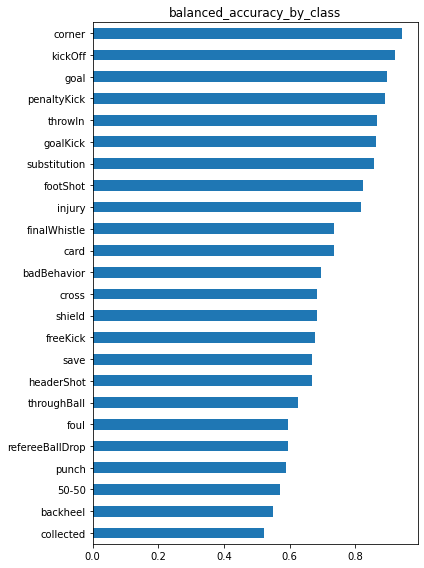

In [66]:
eval.class_idxs
eval.classes
fig, metrics = eval.get_scalar_by_class('test', 'balanced_accuracy', False)
fig